<div>
    <h3>Projeto Análise Turbina Eólica ⚡🔌</h3>
    <img width='600px' src='./Assets/image/fotor-ai-2023070222251_1.jpg'>
    <h6>Projeto de Energia Elétrica que coleta dados de funcionamento de um turbina eólica ⚡🔌</h6>
</div>

##### 1º Passo: importar bibliotecas

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

##### 2º Passo: lendo arquivos
###### Fonte Kaggle: https://www.kaggle.com/berkerisen/wind-turbine-scada-dataset

In [9]:
turbina = pd.read_csv('./Assets/docs/T1.csv')
turbina.columns = ['Data/Hora', 'ActivePower(KW)','VelocidadeVento(M/S)', 'CurvaTeórica(KWH)', 'DireçãoVento(°)']
del turbina['DireçãoVento(°)']
turbina['Data/Hora'] = pd.to_datetime(turbina['Data/Hora'], format='mixed')
display(turbina)

,Data/Hora,ActivePower(KW),VelocidadeVento(M/S),CurvaTeórica(KWH)
0,2018-01-01 00:00:00,380.047791,5.311336,416.328908
1,2018-01-01 00:10:00,453.769196,5.672167,519.917511
2,2018-01-01 00:20:00,306.376587,5.216037,390.900016
3,2018-01-01 00:30:00,419.645905,5.659674,516.127569
4,2018-01-01 00:40:00,380.650696,5.577941,491.702972
...,...,...,...,...
50525,2018-12-31 23:10:00,2963.980957,11.404030,3397.190793
50526,2018-12-31 23:20:00,1684.353027,7.332648,1173.055771
50527,2018-12-31 23:30:00,2201.106934,8.435358,1788.284755
50528,2018-12-31 23:40:00,2515.694092,9.421366,2418.382503


##### 3º Passo: plotando os dados em um gráfico - Real

<Axes: xlabel='VelocidadeVento(M/S)', ylabel='ActivePower(KW)'>

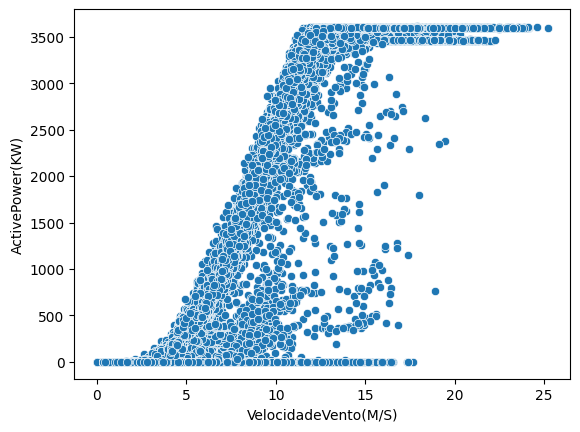

In [10]:
sns.scatterplot(data=turbina, x='VelocidadeVento(M/S)', y='ActivePower(KW)')

##### 4º Passo: plotando os dados em um gráfico - Teórica

<Axes: xlabel='VelocidadeVento(M/S)', ylabel='CurvaTeórica(KWH)'>

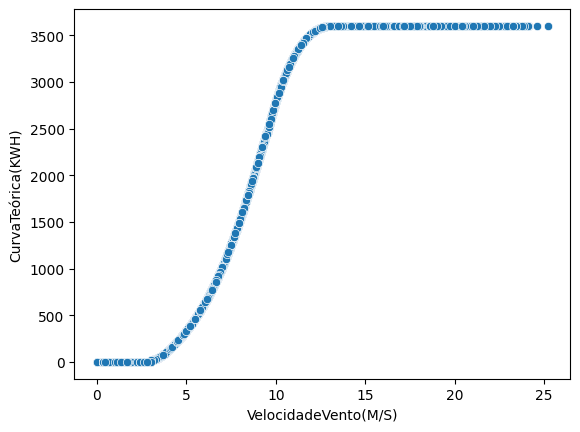

In [11]:
sns.scatterplot(data=turbina, x='VelocidadeVento(M/S)', y='CurvaTeórica(KWH)')

##### 5º Passo: "limites aceitáveis"

In [12]:
pot_real = turbina['ActivePower(KW)'].to_list()
pot_teorica = turbina['CurvaTeórica(KWH)'].to_list()
pot_max = []
pot_min = []
dentro_limit = []

for potencia in pot_teorica:
    pot_max.append(potencia*1.05)
    pot_min.append(potencia*0.95)

for p, potencia in enumerate(pot_real):
    if potencia>=pot_min[p] and potencia<=pot_max[p]:
        dentro_limit.append('Dentro')
    elif potencia == 0:
        dentro_limit.append('Zero')
    else:
        dentro_limit.append('Fora')

print(dentro_limit.count('Dentro')/len(dentro_limit))


0.37286760340391845


##### 6º Passo: adicionando lista "dentro_limite" ao dataframe:

In [13]:
turbina['DentroLimite'] = dentro_limit
display(turbina)

,Data/Hora,ActivePower(KW),VelocidadeVento(M/S),CurvaTeórica(KWH),DentroLimite
0,2018-01-01 00:00:00,380.047791,5.311336,416.328908,Fora
1,2018-01-01 00:10:00,453.769196,5.672167,519.917511,Fora
2,2018-01-01 00:20:00,306.376587,5.216037,390.900016,Fora
3,2018-01-01 00:30:00,419.645905,5.659674,516.127569,Fora
4,2018-01-01 00:40:00,380.650696,5.577941,491.702972,Fora
...,...,...,...,...,...
50525,2018-12-31 23:10:00,2963.980957,11.404030,3397.190793,Fora
50526,2018-12-31 23:20:00,1684.353027,7.332648,1173.055771,Fora
50527,2018-12-31 23:30:00,2201.106934,8.435358,1788.284755,Fora
50528,2018-12-31 23:40:00,2515.694092,9.421366,2418.382503,Dentro


##### 7º Passo: plotando novamente o gráfico

<Axes: xlabel='VelocidadeVento(M/S)', ylabel='ActivePower(KW)'>

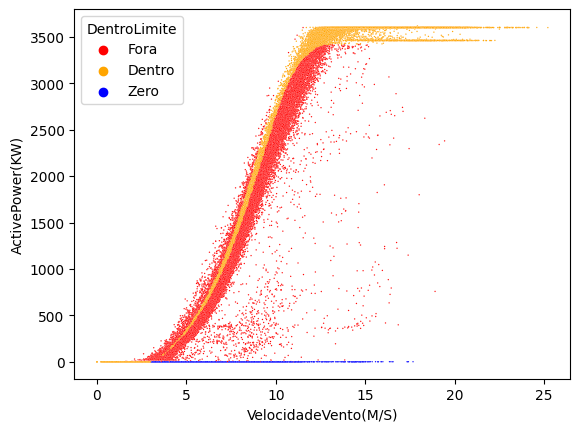

In [16]:
cores= {'Dentro':'orange','Fora':'red', 'Zero':'blue'}
sns.scatterplot(data=turbina, x='VelocidadeVento(M/S)', y='ActivePower(KW)', hue='DentroLimite',s=1, palette=cores)